# STEP 4: Count the number of observations in each ecosystem, during

each month of 2023

Much of the data in GBIF is **crowd-sourced**. As a result, we need not
just the number of observations in each ecosystem each month – we need
to **normalize** by some measure of **sampling effort**. After all, we
wouldn’t expect the same number of observations in the Arctic as we
would in a National Park, even if there were the same number of Veeries.
In this case, we’re normalizing using the average number of observations
for each ecosystem and each month. This should help control for the
number of active observers in each location and time of year.

### Set up your analysis

First things first – let’s load your stored variables.

In [1]:
%store -r

### Identify the ecoregion for each observation

You can combine the ecoregions and the observations **spatially** using
a method called `.sjoin()`, which stands for spatial join.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Check out the <a
href="https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#spatial-joins"><code>geopandas</code>
documentation on spatial joins</a> to help you figure this one out. You
can also ask your favorite LLM (Large-Language Model, like ChatGPT)</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Perform a spatial join</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Identify the correct values for the <code>how=</code> and
<code>predicate=</code> parameters of the spatial join.</li>
<li>Select only the columns you will need for your plot.</li>
<li>Run the code.</li>
</ol></div></div>

In [2]:
gbif_ecoregion_gdf = (
    ecoregions_gdf
    # Match the CRS of the GBIF data and the ecoregions
    .to_crs(gbif_gdf.crs)
    # Find ecoregion for each observation
    .sjoin(
        gbif_gdf,
        how='inner', 
        predicate='contains')
    # Select the required columns
    [['month', 'geometry', 'ECO_NAME', 'index_right', 'OBJECTID']]

    # rename columns as needed
    .rename(columns={
        'ecoregion': 'ecoregion',
        'ECO_NAME': 'name',
        'index_right': 'observation_id',
        'OBJECTID': 'object_id'})
)

gbif_ecoregion_gdf

,month,geometry,name,observation_id,object_id
ecoregion,,,,,
12,5,"MULTIPOLYGON (((-119.53979 55.81661, -119.5443...",Alberta-British Columbia foothills forests,108467,13.0
12,5,"MULTIPOLYGON (((-119.53979 55.81661, -119.5443...",Alberta-British Columbia foothills forests,32240,13.0
12,6,"MULTIPOLYGON (((-119.53979 55.81661, -119.5443...",Alberta-British Columbia foothills forests,134218,13.0
12,7,"MULTIPOLYGON (((-119.53979 55.81661, -119.5443...",Alberta-British Columbia foothills forests,38202,13.0
12,6,"MULTIPOLYGON (((-119.53979 55.81661, -119.5443...",Alberta-British Columbia foothills forests,68377,13.0
...,...,...,...,...,...
839,10,"MULTIPOLYGON (((-9.09602 52.60926, -9.07859 52...",North Atlantic moist mixed forests,145323,845.0
839,9,"MULTIPOLYGON (((-9.09602 52.60926, -9.07859 52...",North Atlantic moist mixed forests,94857,845.0
839,9,"MULTIPOLYGON (((-9.09602 52.60926, -9.07859 52...",North Atlantic moist mixed forests,69125,845.0


### Count the observations in each ecoregion each month

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Group observations by ecoregion</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>columns_to_group_by</code> with a list of columns.
Keep in mind that you will end up with one row for each group – you want
to count the observations in each ecoregion by month.</li>
<li>Select only month/ecosystem combinations that have more than one
occurrence recorded, since a single occurrence could be an error.</li>
<li>Use the <code>.groupby()</code> and <code>.mean()</code> methods to
compute the mean occurrences by ecoregion and by month.</li>
<li>Run the code – it will normalize the number of occurrences by month
and ecoretion.</li>
</ol></div></div>

In [3]:
occurrence_df = (
    gbif_ecoregion_gdf
    # For each ecoregion, for each month...
    .groupby(['ecoregion', 'month'])
    # ...count the number of occurrences
    .agg(occurrences=('observation_id', 'count'))
)

# Get rid of rare observations (possible misidentification?)
occurrence_df = occurrence_df[occurrence_df.occurrences>1]

occurrence_df

# Take the mean by ecoregion
mean_occurrences_by_ecoregion = (
     occurrence_df
     .groupby(['ecoregion'])
     .mean()
 )
# Take the mean by month
mean_occurrences_by_month = (
     occurrence_df
     .groupby(['month'])
     .mean()
 )

occurrence_df

occurrences
ecoregion month             
12        5                2
          6                2
          7                2
16        4                2
          5             2980
...                      ...
833       7              293
          8               40
          9               11
839       9               25
          10               7

[308 rows x 1 columns]

In [4]:
mean_occurrences_by_ecoregion

,occurrences
ecoregion,
12,2.000000
16,1425.333333
22,3.000000
32,930.857143
33,243.142857
...,...
804,6.000000
827,9.000000
832,104.500000


In [5]:
mean_occurrences_by_month

,occurrences
month,
1,7.666667
2,7.333333
3,5.666667
4,140.472222
5,1207.169492
6,1041.571429
7,572.894737
8,164.972973
9,260.897436


### Normalize the observations

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Normalize</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Divide occurrences by the mean occurrences by month AND the mean
occurrences by ecoregion</li>
</ol></div></div>

In [6]:
# Normalize by space and time for sampling effort
occurrence_df['norm_occurrences'] = (
    occurrence_df 
    /mean_occurrences_by_month 
    /mean_occurrences_by_ecoregion
)
occurrence_df

occurrences  norm_occurrences
ecoregion month                               
12        5                2          0.000828
          6                2          0.000960
          7                2          0.001746
16        4                2          0.000010
          5             2980          0.001732
...                      ...               ...
833       7              293          0.002173
          8               40          0.001030
          9               11          0.000179
839       9               25          0.005989
          10               7          0.013328

[308 rows x 2 columns]

<Axes: xlabel='month', ylabel='occurrences'>

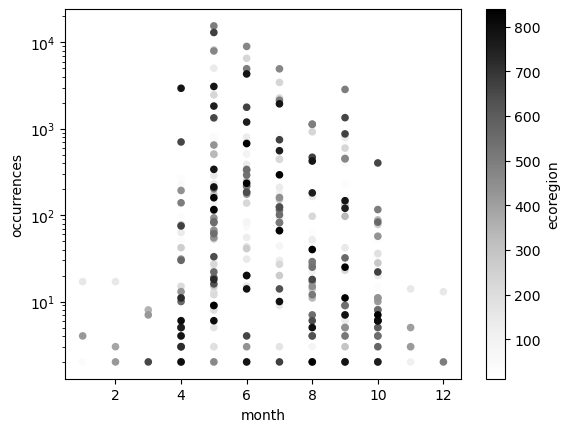

In [7]:
occurrence_df.reset_index().plot.scatter(
    x= 'month',
    y= 'occurrences',
    c= 'ecoregion',
    logy= True
)

# The above plot was done in Elsa's video post
This isnt the best way to plot this data, hard to see where the data is /
what ecoregion it's coming from, so that's why we really want to spatially plot
this which is in the next notebook.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure to store the new version of your <code>DataFrame</code> for
other notebooks!</p>
<div id="2e01613b" class="cell" data-execution_count="9">
<div class="sourceCode" id="cb1"><pre
class="sourceCode python cell-code"><code class="sourceCode python"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="op">%</span>store occurrence_df</span></code></pre></div>
</div></div></div>

In [8]:
%store occurrence_df

Stored 'occurrence_df' (DataFrame)
